# Riley iii

Let's pick up from the second notebook, and alter the colour patterns / rhythms.

In [1]:
import random
import colorsys

import shades

In [2]:
def make_even_pallete(colors_in_pallete, entropy=0, variations=1):
    starter_color = [random.uniform(0, 1) for i in range(3)]
    starter_color = colorsys.rgb_to_hsv(*starter_color)
    # we'll keep the same saturation and value, and space out evenly the hue
    pallete = [
        (
            ((starter_color[0] + (i * 1/colors_in_pallete)) % 1),
            starter_color[1],
            starter_color[2],
        )
        for i in range(colors_in_pallete)]
    # now let's jack up the saturation of one color just to see
    i = random.randint(0, len(pallete)-1)
    pallete[i] = (pallete[i][0], 0.9, pallete[i][2])
    i = random.randint(0, len(pallete)-1)
    pallete[i] = (pallete[i][0], 0.9, pallete[i][2])
    # optionally include light monochrome tone
    if random.random() < 0.5:
        mono = max(pallete[0])
        pallete += [tuple([mono for i in range(3)])]        
    output_pallete = []
    for i in range(variations):
        output_pallete += [
            tuple(int((i + random.uniform(-entropy, entropy)) * 255) for i in color)
            for color in pallete
        ]
    output_pallete = [shades.color_clamp(i) for i in output_pallete]
    return output_pallete

In [3]:
def pick_n_colors(pallete: list, pallete_weights: list, n: int) -> list:
    """
    Pick n colors in line with weights given
    """
    return random.choices(pallete, weights=pallete_weights, k=n)

First, let's change the number of colours between each stack

In [4]:
def riley() -> shades.Canvas:
    pallete = make_even_pallete(
        random.randint(3, 5),
        random.uniform(0, 0.12),
        random.randint(1, 4),
    )
    canvas = shades.Canvas(500, 800)
    ink = shades.BlockColor()
    max_n_colors = random.randint(2, 5)
    n_colors_weights = [random.random() for i in range(max_n_colors)]

    pallete_weights = [random.random() for i in range(len(pallete))]

    grid_width = random.randint(10, 50)
    grid_offset = int(
        random.randint(10, 50)/random.choice([1, 2, 4])
    ) * random.choice([-1, 1]) # we'll shift the offset left and right
    grid_height = abs(grid_offset) * 2 # ensuring exact division
    block_size = random.randint(3, 9)

    for j, x in enumerate(range(-grid_width, canvas.width+grid_width, grid_width)):
        for i, y in enumerate(range(-grid_height-grid_offset, canvas.height+grid_height+grid_offset, grid_height)):
            if (i + j) % block_size == 0:
                num_colors = random.choices([i+1 for i in range(max_n_colors)], weights=n_colors_weights, k=1)[0]
                colors = pick_n_colors(pallete, pallete_weights, num_colors)
            ink.color = colors[i % num_colors]
            ink.shape(
                canvas,
                [(x, y + grid_offset),
                (x + grid_width, y - grid_offset),
                (x + grid_width, y + grid_height - grid_offset),
                (x, y + grid_height + grid_offset)],
            )
        
    return canvas

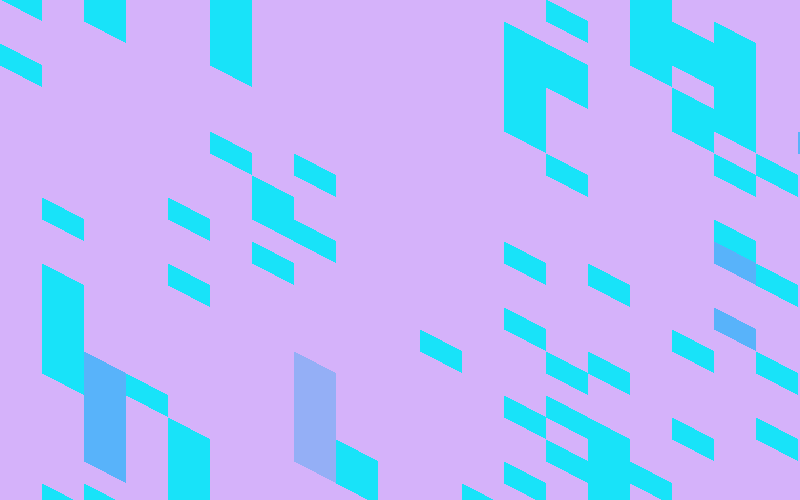

In [5]:
riley()

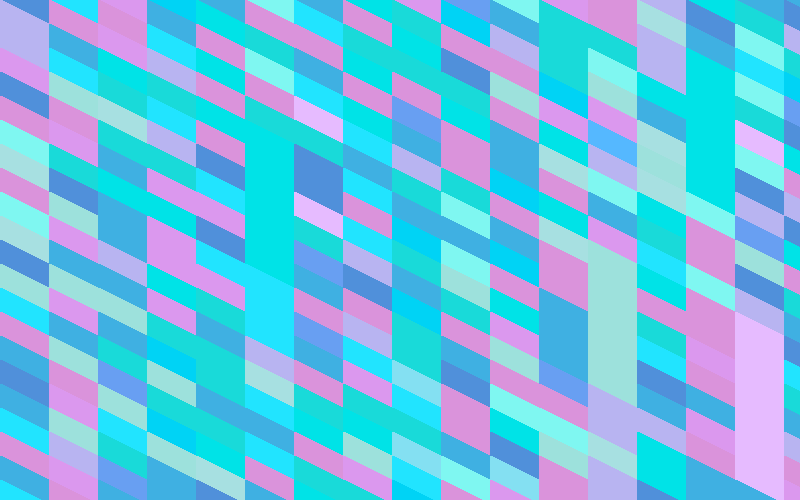

In [6]:
riley()

Now, let's implement different patterns, rather than just rotating round each time.

I.e. for two colours, maybe 'first colour', 'first colour', 'second colours' etc. . .

In [7]:
def riley() -> shades.Canvas:
    pallete = make_even_pallete(
        random.randint(3, 5),
        random.uniform(0, 0.12),
        random.randint(1, 4),
    )
    canvas = shades.Canvas(500, 800)
    ink = shades.BlockColor()
    max_n_colors = random.randint(2, 5)
    n_colors_weights = [random.random() for i in range(max_n_colors)]

    pallete_weights = [random.random() for i in range(len(pallete))]

    grid_width = random.randint(10, 50)
    grid_offset = int(
        random.randint(10, 50)/random.choice([1, 2, 4])
    ) * random.choice([-1, 1]) # we'll shift the offset left and right
    grid_height = abs(grid_offset) * 2 # ensuring exact division
    block_size = random.randint(3, 9)

    for j, x in enumerate(range(-grid_width, canvas.width+grid_width, grid_width)):
        for i, y in enumerate(range(-grid_height-grid_offset, canvas.height+grid_height+grid_offset, grid_height)):
            if (i + j) % block_size == 0:
                num_colors = random.choices([i+1 for i in range(max_n_colors)], weights=n_colors_weights, k=1)[0]
                colors = pick_n_colors(pallete, pallete_weights, num_colors)
                pattern_length = random.randint(1, num_colors*2)
                pattern = [random.choice(colors) for i in range(pattern_length)]
            ink.color = pattern[i % len(pattern)]
            ink.shape(
                canvas,
                [(x, y + grid_offset),
                (x + grid_width, y - grid_offset),
                (x + grid_width, y + grid_height - grid_offset),
                (x, y + grid_height + grid_offset)],
            )
        
    return canvas

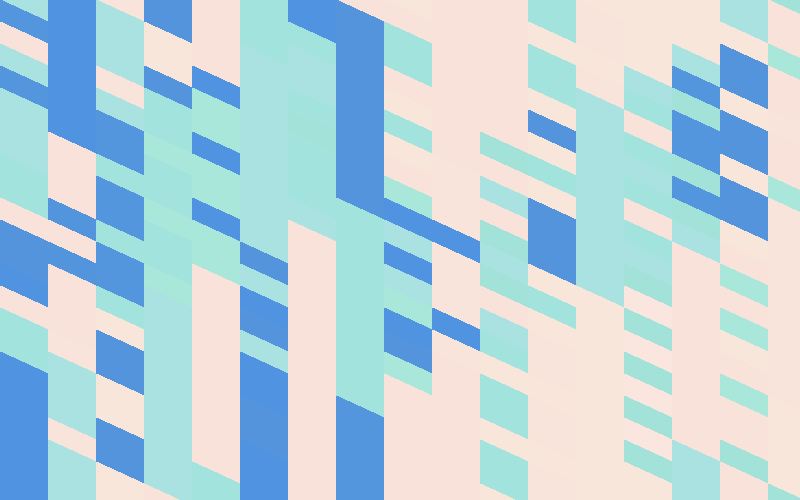

In [8]:
riley()

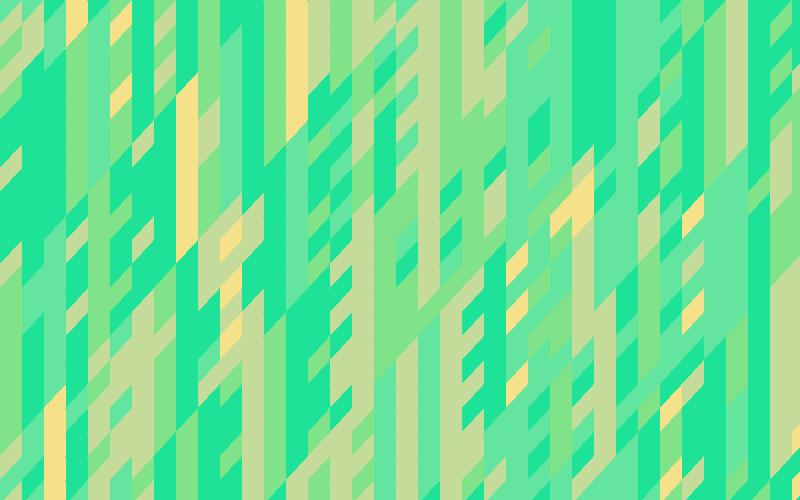

In [9]:
riley()

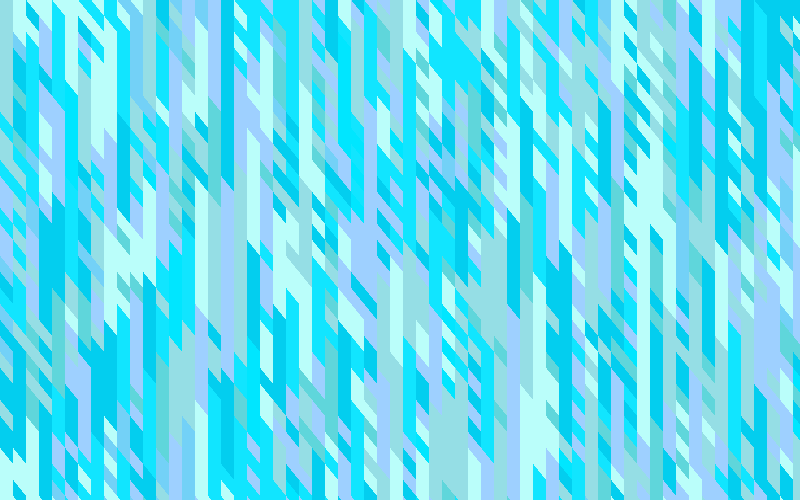

In [10]:
riley()